In [0]:
import torch
import torch.optim as opt
import torch.nn as nn #les ftss déjà implementés cnn, rnn
import torch.nn.functional as F
import torchvision #njibou men aandou data set mte3na
import torchvision.transforms as transforms #data augmentation, tbedel contrast, crop

import numpy as np
import matplotlib.pyplot as plt #visualization
%matplotlib inline

In [0]:
mb_size = 64

transform = transforms.ToTensor() #image men 0..255, nejem naamel biiha transformation, normalization

trainData = torchvision.datasets.MNIST('./data/', download=True, transform=transform, train=True)

trainLoader = torch.utils.data.DataLoader(trainData, shuffle=True, batch_size=mb_size)  #data idowloadih w yaamlelha shuffle

In [0]:
dataIter = iter(trainLoader) #

imgs, labels = dataIter.next() #1channel 28 height w 28 witdh

In [0]:
imgs.shape

torch.Size([64, 1, 28, 28])

In [0]:
def imshow(imgs):
    imgs = torchvision.utils.make_grid(imgs)
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

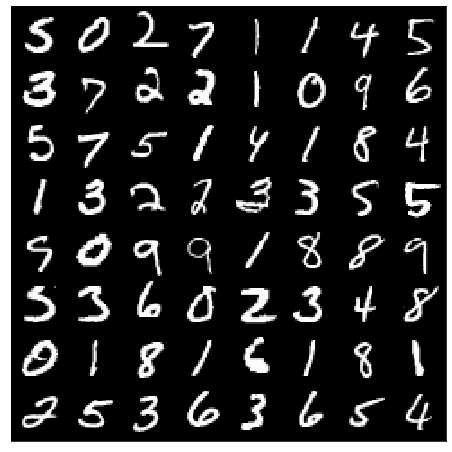

In [0]:
imshow(imgs)

In [0]:
Z_dim = 100 #noise
H_dim = 128 
X_dim = imgs.view(imgs.size(0), -1).size(1)

print(Z_dim, H_dim, X_dim)

device = 'cuda' #bech nestamlou GPU

100 128 784


In [0]:
class Gen(nn.Module): #geneerator
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(Z_dim, H_dim), #fully connected, dimension mte3 noise Z,output hiya teswira ya real ya fake
            nn.ReLU(), #activation function
            nn.Linear(H_dim, X_dim),
            nn.Sigmoid()
        )
          
    def forward(self, input):
        return self.model(input)

In [0]:
class Generator(nn.Module): #base module

  def __init__(self): #init constructeur:
    super(Generator,self).__init__() #init de neural network
    #fully connected bel pytorch
    self.FC1 = nn.linear(100, 128)
    self.FC2 = nn.linear(128, 512)
    self.FC3 = nn.linear(512, 28*28) #28*28 dimension mte3 teswira 
    #/// bach normalization mte3 weights,  and parametrs bech tetjaneb l overfitting ( cnn 3adi ala tsawer 9tates couleur orangé, ki bech trani tsawer moush moujoudin fel data, naamel bach normalization bech inejem yaamel classification) // nejem nestaamel el drop out bech nehi l overfitting
    self.BN1 = nn.BatchNorm1d(128)
    self.BN2 = nn.BatchNorm1d(512)





In [0]:
G = Gen().to(device)

In [0]:
class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input):
        return self.model(input)

In [0]:
D = Dis().to(device)

In [0]:
print(G)
print(D)

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)
Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [0]:
lr = 1e-3

g_opt = opt.Adam(G.parameters(), lr=lr)
d_opt = opt.Adam(D.parameters(), lr=lr)

Epoch:0,   G_loss:4.889426024737897,    D_loss:0.15267149453807963


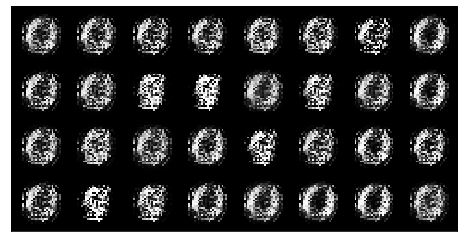

Epoch:1,   G_loss:4.636883422509948,    D_loss:0.10366168184710273


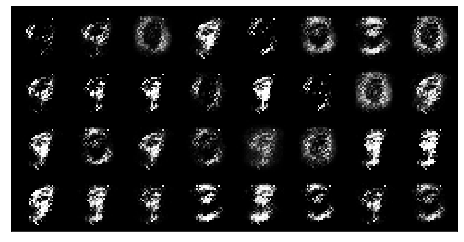

Epoch:2,   G_loss:4.147413845255431,    D_loss:0.1728011868469147


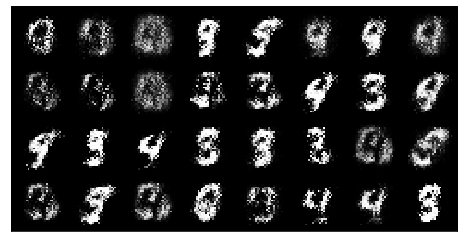

Epoch:3,   G_loss:4.034641259768878,    D_loss:0.2531535611597142


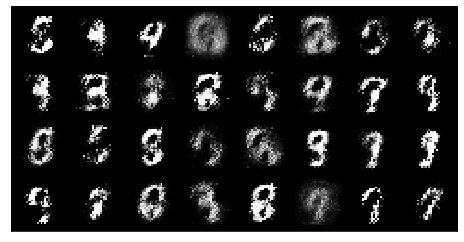

Epoch:4,   G_loss:3.9033607531712256,    D_loss:0.3853343829655571


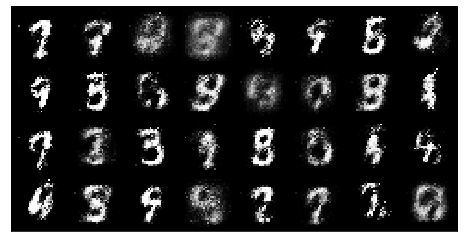

Epoch:5,   G_loss:3.3734236355783587,    D_loss:0.5616219903805109


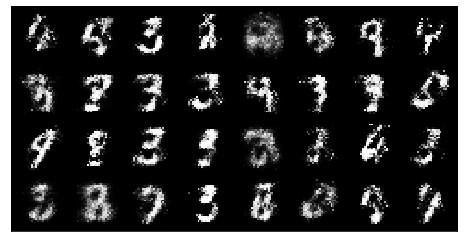

Epoch:6,   G_loss:3.1611895380752175,    D_loss:0.6535288639255424


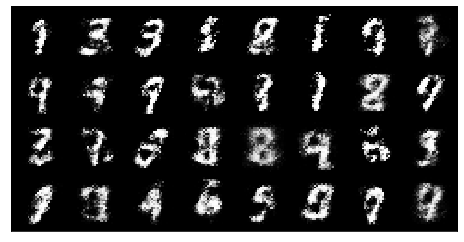

Epoch:7,   G_loss:2.6332327586247213,    D_loss:0.7335570813305596


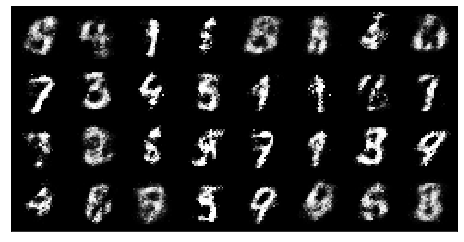

Epoch:8,   G_loss:2.673937496218854,    D_loss:0.7652757686656168


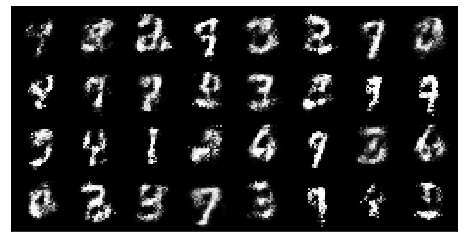

Epoch:9,   G_loss:2.2835674743408334,    D_loss:0.7941244358319972


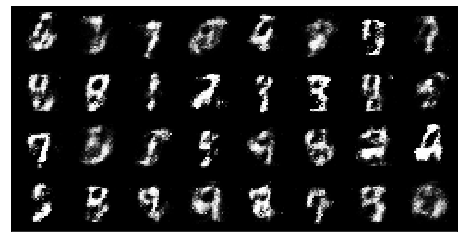

Epoch:10,   G_loss:2.3360049788123254,    D_loss:0.8532328986282796


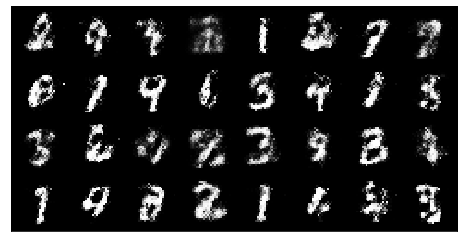

Epoch:11,   G_loss:2.1839960053531344,    D_loss:0.9376192583775977


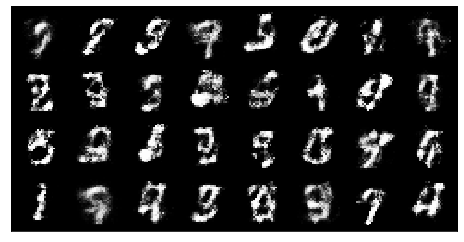

Epoch:12,   G_loss:1.9224328671945439,    D_loss:0.989389686092639


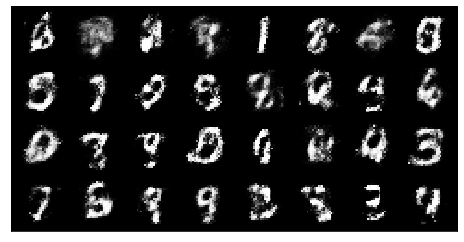

Epoch:13,   G_loss:1.8326458572578836,    D_loss:0.969661707626477


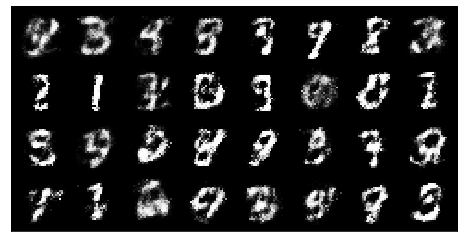

Epoch:14,   G_loss:1.8293764265869725,    D_loss:0.935182800234508


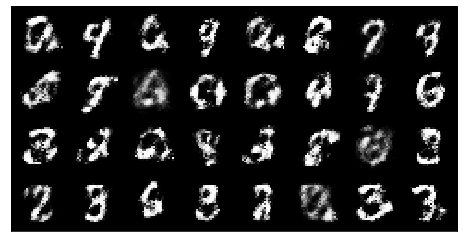

Epoch:15,   G_loss:1.8306693401672185,    D_loss:0.9602172934869205


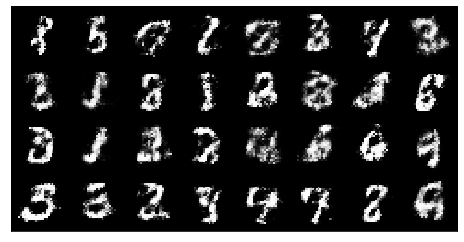

Epoch:16,   G_loss:1.7589493935296276,    D_loss:0.9582894769177508


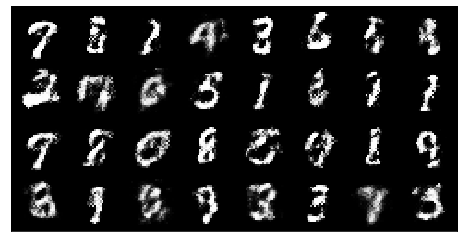

Epoch:17,   G_loss:1.7415837817100575,    D_loss:0.9457778556387562


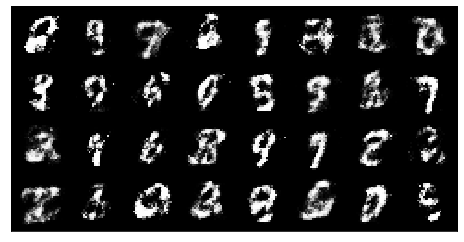

Epoch:18,   G_loss:1.708498752955943,    D_loss:0.9297582463923294


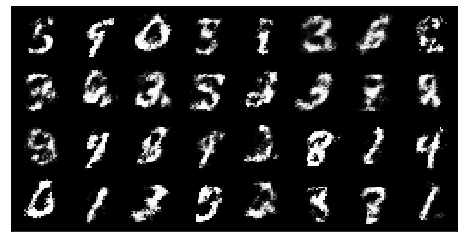

Epoch:19,   G_loss:1.6809339145861708,    D_loss:0.9550580855117423


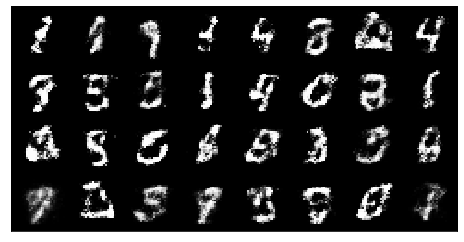

In [0]:
for epoch in range(20):
    G_loss_run = 0.0
    D_loss_run = 0.0
    for i, data in enumerate(trainLoader):
        X, _ = data
        X = X.view(X.size(0), -1).to(device)
        mb_size = X.size(0)
        
        one_labels = torch.ones(mb_size, 1).to(device)
        zero_labels = torch.zeros(mb_size, 1).to(device)
        
        z = torch.randn(mb_size, Z_dim).to(device)
        
        d_opt.zero_grad()

        D_real = D(X)
        D_fake = D(G(z))
        
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        D_loss = D_real_loss + D_fake_loss
        
        D_loss.backward()
        d_opt.step()
        
        z = torch.randn(mb_size, Z_dim).to(device)
        
        g_opt.zero_grad()
        D_fake = D(G(z))
        G_loss = F.binary_cross_entropy(D_fake, one_labels)
        
        
        G_loss.backward()
        g_opt.step()
        
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
        
    print('Epoch:{},   G_loss:{},    D_loss:{}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1)))
    
    samples = G(z).detach()
    samples = samples.view(samples.size(0), 1, 28, 28).cpu()
    imshow(samples)
